# CRM Data Analyst Case - Part 2

### Description

The primary objective of this project is to improve the accuracy of customer data in the CRM system using AI-based solutions. Inaccurate data negatively impacts marketing campaigns, resulting in poor targeting and reduced ROI. To address this issue, the team aims to build a predictive model that identifies and rectifies inaccurate customer records, thereby improving overall data quality and enabling more effective marketing strategies.

A pilot analysis was conducted on 10,000 CRM records, revealing that 20% of the data was inconsistent or outdated. The estimated financial impact of inaccurate data led to a significant decline in campaign success rates.
The goal is to develop a model that accurately detects data discrepancies, allowing the company to maintain a reliable customer database and make informed decisions based on high-quality data.

### Key Objectives are:

1. Data Analysis and Insights:
   - Perform data cleaning, handling missing values, and removing duplicates.
   - Identify patterns and anomalies in the dataset that contribute to data inaccuracies.
2. Customer Segmentation:
   - Group customers based on their behaviors and data quality indicators.
   - Understand the characteristic features of customers with accurate and consistent data.
3. Predictive Model Development:
   - Build a machine learning model to detect inaccurate data records.
   - Evaluate the model’s performance and optimize it for high precision and recall.
4. Feature Importance and Visualization:
   - Identify key features that influence data accuracy.
   - Present insights and recommendations through visualizations to improve data-driven decisions.

### Deliverables:

1. Data Cleaning and EDA – Initial data exploration, handling missing values, and detecting anomalies.
2. Segmentation Analysis – Grouping customers based on behaviors and data accuracy indicators.
3. Predictive Model Implementation – Using machine learning to classify and correct inaccurate records.
4. Feature Importance & Visualization – Highlighting the key factors affecting CRM data accuracy.

In [ ]:
!pip install dataframe_image

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

import dataframe_image as dfi # converting dataframe into Image

In [4]:
# Read Dataset
url = 'clean_marketing_data.csv'
df = pd.read_csv(url)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,8996,1957,PhD,Married,51381,2,1,11/19/12,4,230,...,8,9,0,0,0,0,0,0,0,GER
1,1994,1983,Graduation,Married,51381,1,0,11/15/13,11,5,...,2,7,0,0,0,0,0,0,0,US
2,3769,1972,PhD,Together,51381,1,0,3/2/14,17,25,...,3,7,0,0,0,0,0,0,0,AUS
3,5255,1986,Graduation,Single,51381,1,0,2/20/13,19,5,...,0,1,0,0,0,0,0,0,0,AUS
4,8268,1961,PhD,Married,51381,0,1,7/11/13,23,352,...,7,6,0,0,0,0,0,0,0,CA


In [5]:
df_new = df.copy()
df_new.drop(['ID', 'Year_Birth', 'Dt_Customer', 'Country'], axis=1, inplace=True)

In [6]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Education            2240 non-null   object
 1   Marital_Status       2240 non-null   object
 2   Income               2240 non-null   int64 
 3   Kidhome              2240 non-null   int64 
 4   Teenhome             2240 non-null   int64 
 5   Recency              2240 non-null   int64 
 6   MntWines             2240 non-null   int64 
 7   MntFruits            2240 non-null   int64 
 8   MntMeatProducts      2240 non-null   int64 
 9   MntFishProducts      2240 non-null   int64 
 10  MntSweetProducts     2240 non-null   int64 
 11  MntGoldProds         2240 non-null   int64 
 12  NumDealsPurchases    2240 non-null   int64 
 13  NumWebPurchases      2240 non-null   int64 
 14  NumCatalogPurchases  2240 non-null   int64 
 15  NumStorePurchases    2240 non-null   int64 
 16  NumWeb

In [7]:
education=pd.get_dummies(df_new['Education'],drop_first=True)
marital=pd.get_dummies(df_new['Marital_Status'],drop_first=True)

In [8]:
df_new

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
0,PhD,Married,51381,2,1,4,230,42,192,49,...,2,8,9,0,0,0,0,0,0,0
1,Graduation,Married,51381,1,0,11,5,5,6,0,...,0,2,7,0,0,0,0,0,0,0
2,PhD,Together,51381,1,0,17,25,1,13,0,...,0,3,7,0,0,0,0,0,0,0
3,Graduation,Single,51381,1,0,19,5,1,3,3,...,0,0,1,0,0,0,0,0,0,0
4,PhD,Married,51381,0,1,23,352,0,27,10,...,1,7,6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,PhD,Divorced,66476,0,1,99,372,18,126,47,...,2,11,4,0,0,0,0,0,0,0
2236,2n Cycle,Married,31056,1,0,99,5,10,13,3,...,0,3,8,0,0,0,0,0,0,0
2237,Graduation,Divorced,46310,1,0,99,185,2,88,15,...,1,5,8,0,0,0,0,0,0,0
2238,Graduation,Married,65819,0,0,99,267,38,701,149,...,4,10,3,0,0,0,0,0,0,0


In [9]:
new_data=pd.concat([df_new,education,marital],axis=1)

In [10]:
new_data.drop(['Education','Marital_Status'],axis=1,inplace=True)

In [11]:
# Split dataset into features and labels
features = new_data.drop('Response', axis =1)
labels = df.Response

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.40, random_state = 5)

In [12]:
print('Train_x:',X_train.shape)
print('Train_y:',y_train.shape)
print('Test_x:',X_test.shape)
print('Test_y:',y_test.shape)

Train_x: (1344, 32)
Train_y: (1344,)
Test_x: (896, 32)
Test_y: (896,)


In [13]:
## Standardizing the data
from sklearn.preprocessing import StandardScaler
obje_ss=StandardScaler()

x_train_ss=obje_ss.fit_transform(X_train)
x_test_ss=obje_ss.fit_transform(X_test)

## 1. Logistic regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

model_le=LogisticRegression(random_state=42, max_iter=10000)
model_le.fit(X_train, y_train)

parameters = {'C':[0.8,0.9,1,1.1,1.2], 'penalty':['l1','l2'],  'solver':['liblinear','saga']}

model_le_grid = GridSearchCV(model_le, parameters, cv=10, verbose=1, n_jobs=-1).fit(X_train, y_train)
print(model_le_grid.best_params_)

print('Logistic Regression Train score:', model_le.score(X_train,y_train)*100)
print('Logistic Regression Cross validation score:', model_le_grid.best_score_*100)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
{'C': 1.1, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression Train score: 89.65773809523809
Logistic Regression Cross validation score: 89.05527915975678


In [16]:
model_le=LogisticRegression(C=1.1, penalty='l1', solver='liblinear')
model_le.fit(X_train,y_train)
print('Logistic Regression Train score:', model_le.score(X_train,y_train)*100)

predictions = model_le.predict(X_test)
print("Accuracy:",metrics.accuracy_score(predictions, y_test)*100)

Logistic Regression Train score: 90.02976190476191
Accuracy: 87.72321428571429


## 2. Support vector machine

In [17]:
from sklearn import svm

model_svc=svm.SVC(random_state=42)
parameters = {'kernel':('linear', 'rbf','poly'), 'C':[0.8,0.9,1,1.1,1.2],'degree':[3,4,5,6]}
model_svc_grid = GridSearchCV(model_svc, parameters,cv=10,verbose=1,n_jobs=-1).fit(x_train_ss,y_train)
print(model_svc_grid.best_params_)

print('Support Vecktor Classification Cross validation score:', model_svc_grid.best_score_*100)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
{'C': 0.8, 'degree': 3, 'kernel': 'linear'}
Support Vecktor Classification Cross validation score: 88.98231066887783


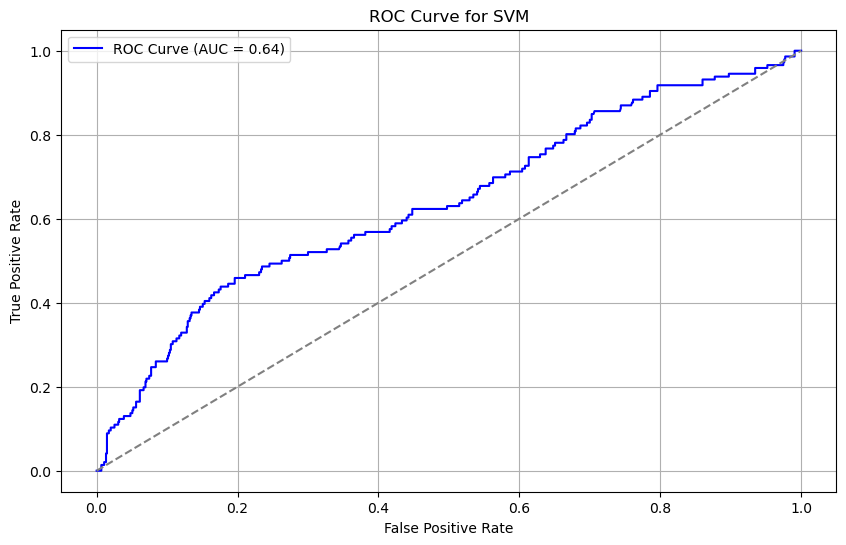

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Get decision scores for the ROC curve
y_score = model_svc_grid.decision_function(X_test)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = roc_auc_score(y_test, y_score)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend()
plt.grid()
plt.show()


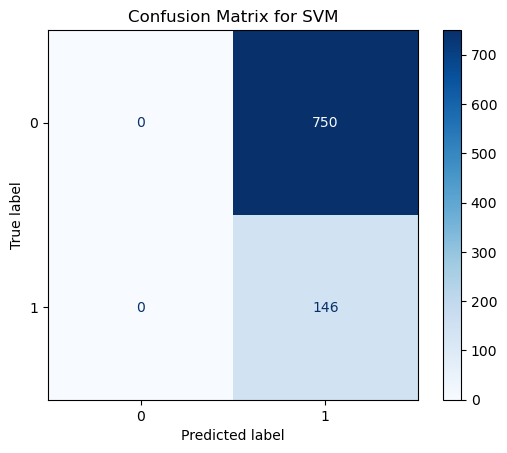

In [32]:
# Predict the labels for the test set
y_pred = model_svc_grid.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_svc_grid.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.show()


In [19]:
model_svc=svm.SVC(degree =3, C=0.8,kernel='linear')
model_svc.fit(x_train_ss,y_train)
print('Support Vecktor Classification Train score:', model_svc.score(x_train_ss,y_train)*100)

predictions = model_svc_grid.predict(x_test_ss)
print("Accuracy:",metrics.accuracy_score(predictions, y_test)*100)

Support Vecktor Classification Train score: 90.32738095238095
Accuracy: 86.49553571428571


## 4. Generating the Model - Random Forest Regressor using GridSearchCv

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = { 
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt'],  # Use 'sqrt' instead of 'auto'
    'max_depth': [None, 3, 5, 8],
    'criterion': ['gini'],
    'min_samples_split': [2, 3, 4]
}

# Initialize GridSearchCV
rf_models = GridSearchCV(
    RandomForestClassifier(random_state=5), 
    param_grid=param_grid, 
    cv=5, 
    verbose=1
)

# Train the models
rf_models.fit(X_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=5),
             param_grid={'criterion': ['gini'], 'max_depth': [None, 3, 5, 8],
                         'max_features': ['sqrt'],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [21]:
# Get the predictions
predictions = rf_models.predict(X_test)

# Print the Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(predictions, y_test))

Accuracy: 0.8616071428571429


## Feature Importance

Calculating top 15 features

In [22]:
# Print Feature Importance

feature_importance = pd.DataFrame(data={"features": X_test.columns, 
                            "importance":rf_models.best_estimator_.feature_importances_*100})

feature_importance = feature_importance.sort_values('importance', 
            ascending=False).head(15)
feature_imp_styled = feature_importance.style.background_gradient(cmap='coolwarm', low=1, high=0)

feature_imp_styled

,features,importance
3,Recency,10.658893
4,MntWines,8.670528
6,MntMeatProducts,8.194544
0,Income,7.778617
9,MntGoldProds,6.087945
14,NumWebVisitsMonth,4.758755
18,AcceptedCmp1,4.727924
5,MntFruits,4.722485
17,AcceptedCmp5,4.479031
8,MntSweetProducts,4.460659


In [24]:
feat_values = feature_importance.features.values.tolist()
feat_values

['Recency',
 'MntWines',
 'MntMeatProducts',
 'Income',
 'MntGoldProds',
 'NumWebVisitsMonth',
 'AcceptedCmp1',
 'MntFruits',
 'AcceptedCmp5',
 'MntSweetProducts',
 'MntFishProducts',
 'NumStorePurchases',
 'NumCatalogPurchases',
 'AcceptedCmp3',
 'NumWebPurchases']

In [25]:
# Split dataset into features and labels
features_feat = new_data.loc[:, feat_values]
labels_feat = df.Response

# Split dataset into training set and test set
X_train_feat, X_test_feat, y_train_feat, y_test_feat = train_test_split(features_feat, labels_feat, test_size=0.40, random_state = 5)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

model_le=LogisticRegression(random_state=42, max_iter=10000)
model_le.fit(X_train_feat, y_train_feat)

parameters = {'C':[0.8,0.9,1,1.1,1.2], 'penalty':['l1','l2'],  'solver':['liblinear','saga']}

model_le_grid = GridSearchCV(model_le, parameters, cv=10, verbose=1, n_jobs=-1).fit(X_train_feat, y_train_feat)
print(model_le_grid.best_params_)

print('Logistic Regression Train score:', model_le.score(X_train_feat,y_train_feat)*100)
print('Logistic Regression Cross validation score:', model_le_grid.best_score_*100)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
{'C': 1.1, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression Train score: 88.83928571428571
Logistic Regression Cross validation score: 88.38529574350471


In [27]:
model_le=LogisticRegression(C=1.1, penalty='l1', solver='liblinear')
model_le.fit(X_train_feat, y_train_feat)
print('Logistic Regression Train score:', model_le.score(X_train_feat,y_train_feat)*100)

predictions = model_le.predict(X_test_feat)
print("Accuracy:", metrics.accuracy_score(predictions, y_test_feat)*100)

Logistic Regression Train score: 88.98809523809523
Accuracy: 85.71428571428571
